In [150]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
# Încarcare date
file = 'REMS_Mars_Dataset.csv'
data = pd.read_csv(file)

In [152]:
#Vizualizare date
df = pd.read_csv('REMS_Mars_Dataset.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [153]:
# Selecție date intrare
X = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]
X = np.array(X)
X.shape

(96453, 4)

In [154]:
# Selecție date iesire
y = df['Temperature (C)']
y = np.array(y)
y.shape

(96453,)

In [155]:
# Split pentru setul de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [156]:
# Normalizare
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
# Construire model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(90,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])



In [158]:
#Compilare model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')


In [159]:
#Antrenarea modelului
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2412/2412 [==============================] - 3s 1ms/step - loss: 5.2528 - val_loss: 4.9494
Epoch 2/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.9330 - val_loss: 5.1041
Epoch 3/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.9191 - val_loss: 4.9508
Epoch 4/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.9042 - val_loss: 4.8813
Epoch 5/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.9040 - val_loss: 4.9278
Epoch 6/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.8998 - val_loss: 4.9670
Epoch 7/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.8843 - val_loss: 4.9656
Epoch 8/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.8791 - val_loss: 4.9243
Epoch 9/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.8792 - val_loss: 4.9361
Epoch 10/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.872

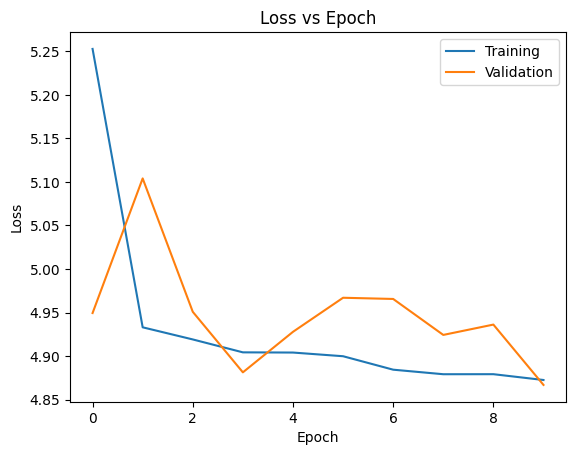

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])


In [120]:
#Predictie
y_pred = model.predict(X_test)

603/603 [==============================] - 0s 679us/step


In [121]:
print(y_pred[:10])
print(y_test[:10])

[[23.285646  ]
 [ 7.2017803 ]
 [10.826939  ]
 [ 8.419073  ]
 [-0.09507053]
 [13.4364195 ]
 [23.561571  ]
 [ 9.813883  ]
 [ 5.461351  ]
 [10.540612  ]]
[28.12222222 10.         14.4         1.01666667 -0.12222222  2.02222222
 26.11111111 16.01666667  9.88888889  8.38333333]


In [161]:
#Impartim setul de date
def batch(X, y , batch_size):
    for i in range(0,len(X), batch_size):
        yield X[i:i+batch_size], y[i:i+batch_size]
batch(X_train, y_train, 32)
batch(X_test, y_test, 32)

<generator object batch at 0x000002213B923340>

In [162]:
# Construire model2
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(90,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])


In [163]:
#Compilare model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')

In [164]:
#Antrenarea modelului
history = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
2412/2412 [==============================] - 3s 1ms/step - loss: 5.2348 - val_loss: 4.9628
Epoch 2/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.9527 - val_loss: 4.9201
Epoch 3/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.9374 - val_loss: 4.9608
Epoch 4/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.9171 - val_loss: 4.8913
Epoch 5/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.9045 - val_loss: 4.9092
Epoch 6/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.8995 - val_loss: 4.9142
Epoch 7/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.8825 - val_loss: 4.9374
Epoch 8/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.8807 - val_loss: 4.9360
Epoch 9/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.8872 - val_loss: 4.8778
Epoch 10/10
2412/2412 [==============================] - 3s 1ms/step - loss: 4.880

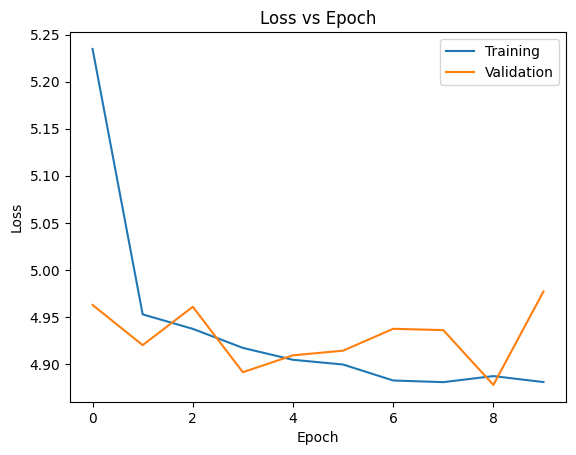

In [165]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [166]:
#Predictie2
y_pred = model_2.predict(X_test)

603/603 [==============================] - 1s 803us/step


In [169]:
#Date prezise
print(y_pred[:10])
#Date reale
print(y_test[:10])

[[20.635962 ]
 [ 4.676874 ]
 [10.468431 ]
 [ 9.102609 ]
 [-1.0744144]
 [ 9.047751 ]
 [20.10736  ]
 [ 8.709911 ]
 [ 8.184622 ]
 [11.36964  ]]
[28.12222222 10.         14.4         1.01666667 -0.12222222  2.02222222
 26.11111111 16.01666667  9.88888889  8.38333333]
